# Regression with Ames housing data

In [1]:
import pandas as pd
df = pd.read_excel('data/AmesHousing.xlsx')

In [2]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.tail()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df['Condition 1'].value_counts()

Norm      2522
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition 1, dtype: int64

In [6]:
df['PID'].value_counts()

527106050    1
528456190    1
905479110    1
527163020    1
923228290    1
            ..
923252080    1
908275090    1
535455090    1
923228200    1
905101310    1
Name: PID, Length: 2930, dtype: int64

In [7]:
df['TotRms AbvGrd'].value_counts(dropna=False, normalize=True)

6     0.288055
7     0.221502
5     0.200000
8     0.118430
4     0.069283
9     0.048805
10    0.027304
11    0.010922
3     0.008874
12    0.005461
2     0.000341
14    0.000341
13    0.000341
15    0.000341
Name: TotRms AbvGrd, dtype: float64

In [8]:
X_cols = ['Full Bath', '1st Flr SF', '2nd Flr SF', 'Kitchen Qual', 'Bldg Type', 'Garage Yr Blt', 'TotRms AbvGrd']
y_col = ['SalePrice']

In [9]:
df = df[X_cols + y_col]

In [10]:
df.to_csv('selected_features_housing')

In [11]:
df['SalePrice'].median()

160000.0

In [12]:
quantiles = df['SalePrice'].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]).to_list()
quantiles

[105450.00000000001,
 124000.0,
 135000.0,
 146500.0,
 160000.0,
 178535.99999999994,
 199500.0,
 230000.0,
 281241.69999999995]

# Data Exploration

## Sale price distribution

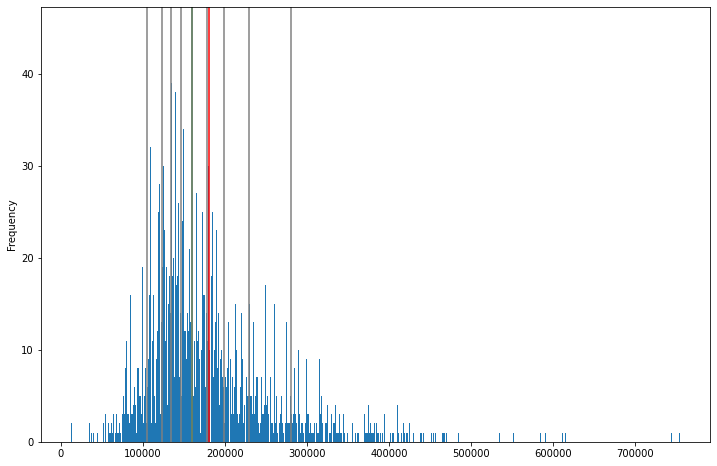

In [13]:
ax = df['SalePrice'].plot(kind='hist', bins=1000, figsize=(12,8))
ax.axvline(180796, color='red')
ax.axvline(160000.0, color='green')

for q in quantiles:
    ax.axvline(q, color='grey')


In [14]:
(df['SalePrice'] < 300000).mean()

0.9187713310580204

In [15]:
import numpy as np
df["LogSalePrice"] = np.log(df["SalePrice"])

In [16]:
df["SalePrice"].min()

12789

<AxesSubplot:ylabel='Frequency'>

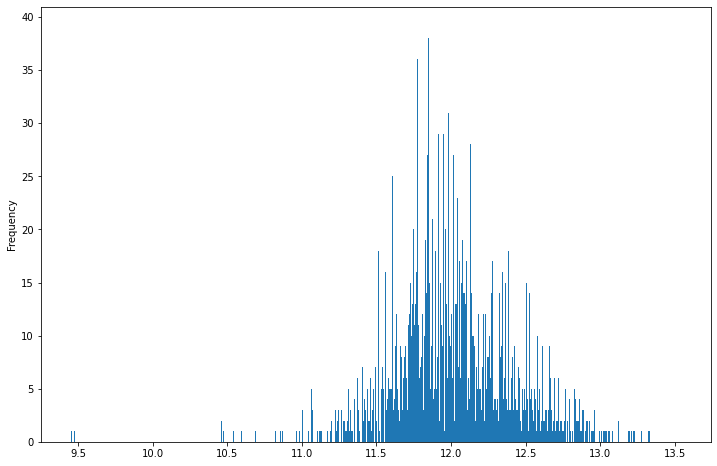

In [17]:
df['LogSalePrice'].plot(kind='hist', bins=1000, figsize=(12,8))

<AxesSubplot:ylabel='Frequency'>

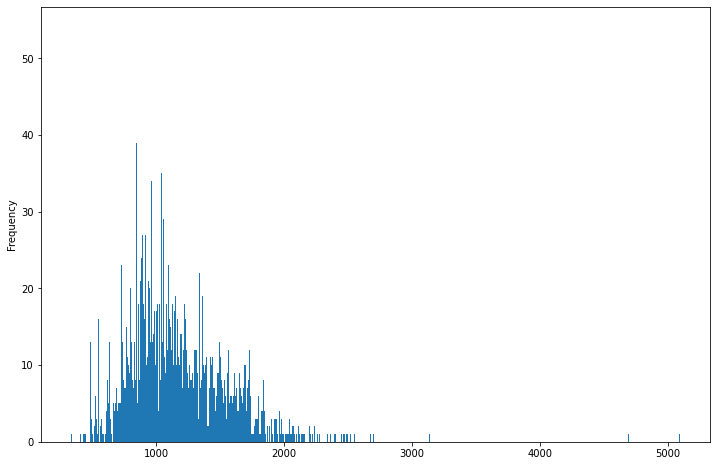

In [18]:
df['1st Flr SF'].plot(kind='hist', bins=1000, figsize=(12,8))

In [19]:
df["SQRTSalePrice"] = np.sqrt(df["SalePrice"])

<AxesSubplot:ylabel='Frequency'>

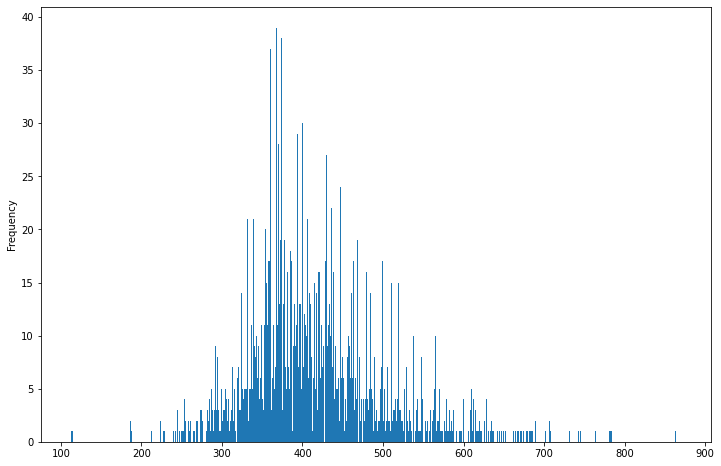

In [20]:
df['SQRTSalePrice'].plot(kind='hist', bins=1000, figsize=(12,8))

In [21]:
df["4thRootSalePrice"] = np.sqrt(df["SQRTSalePrice"])

<AxesSubplot:ylabel='Frequency'>

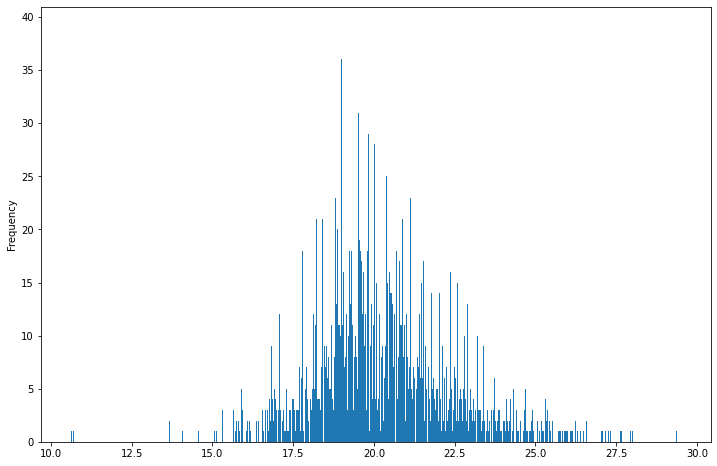

In [22]:
df['4thRootSalePrice'].plot(kind='hist', bins=1000, figsize=(12,8))

# 1st floor square feet versus sale price

- A decently linear relationship between these variables
- Some outlying low value, high SQFT properties. We hope that kitchen quality can explain these
- Some high value, low(ish) SQFT properties. We might need to include location or lot based fields to capture why these have higher value
- Not normally distributed with a heavy tail in both variables



<AxesSubplot:xlabel='SalePrice', ylabel='1st Flr SF'>

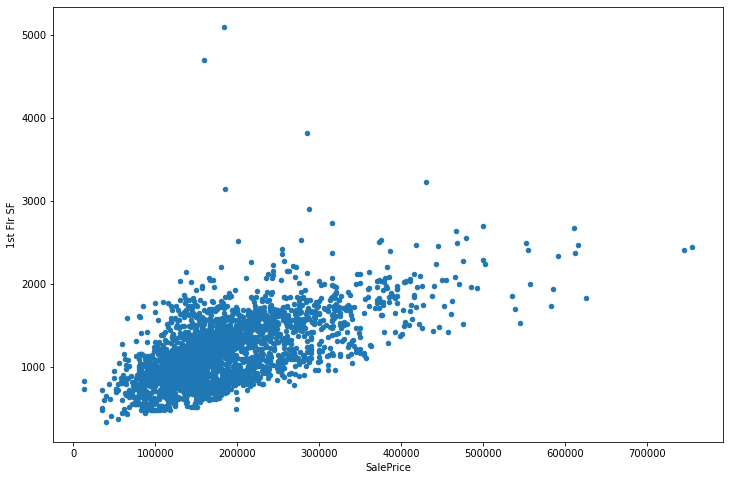

In [23]:
df[['1st Flr SF', 'SalePrice']].plot(kind='scatter', x='SalePrice', y='1st Flr SF', figsize=(12,8))

<AxesSubplot:ylabel='Frequency'>

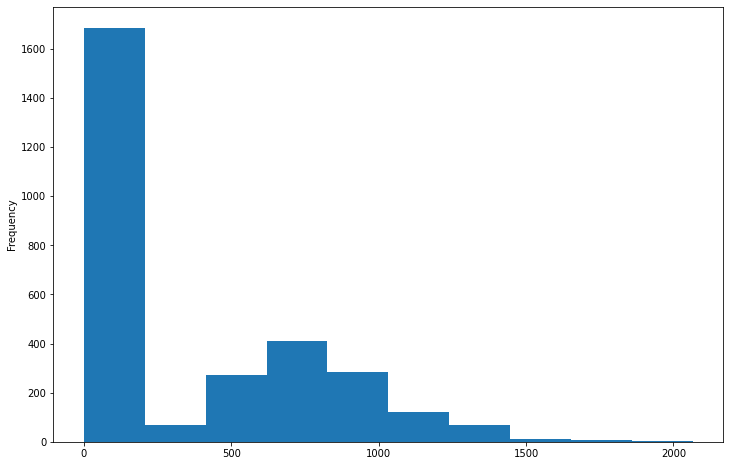

In [24]:
df['2nd Flr SF'].plot(kind='hist', bins=10, figsize=(12,8))

<AxesSubplot:xlabel='SalePrice', ylabel='2nd Flr SF'>

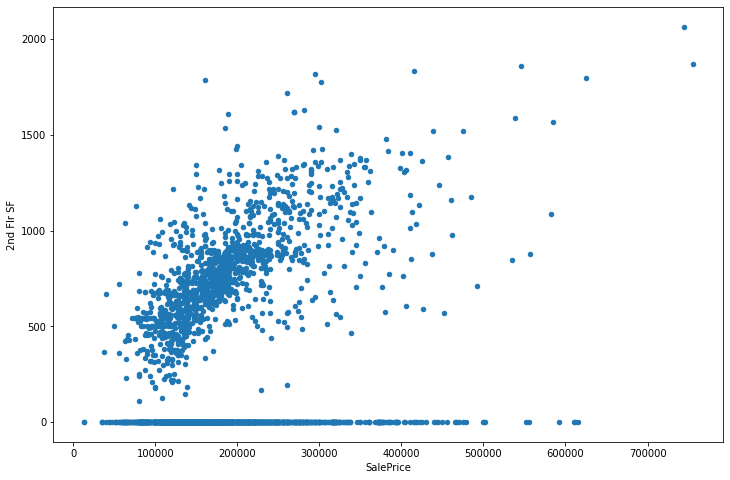

In [25]:
df[['2nd Flr SF', 'SalePrice']].plot(kind='scatter', x='SalePrice', y='2nd Flr SF', figsize=(12,8))

In [26]:
(df['SalePrice'] < 300000)
df['TotalSqFt'] = df['1st Flr SF'] + df['2nd Flr SF']
df = df[['Full Bath', '1st Flr SF', '2nd Flr SF', 'TotalSqFt', 'Kitchen Qual', 'Bldg Type', 'Garage Yr Blt', 'TotRms AbvGrd', 'SalePrice', 'LogSalePrice', 'SQRTSalePrice', '4thRootSalePrice']]

In [27]:
df

,Full Bath,1st Flr SF,2nd Flr SF,TotalSqFt,Kitchen Qual,Bldg Type,Garage Yr Blt,TotRms AbvGrd,SalePrice,LogSalePrice,SQRTSalePrice,4thRootSalePrice
0,1,1656,0,1656,TA,1Fam,1960.0,7,215000,12.278393,463.680925,21.533252
1,1,896,0,896,TA,1Fam,1961.0,5,105000,11.561716,324.037035,18.001029
2,1,1329,0,1329,Gd,1Fam,1958.0,6,172000,12.055250,414.728827,20.364892
3,2,2110,0,2110,Ex,1Fam,1968.0,8,244000,12.404924,493.963561,22.225291
4,2,928,701,1629,TA,1Fam,1997.0,6,189900,12.154253,435.775171,20.875229
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1,1003,0,1003,TA,1Fam,1984.0,6,142500,11.867097,377.491722,19.429146
2926,1,902,0,902,TA,1Fam,1983.0,5,131000,11.782953,361.939221,19.024700
2927,1,970,0,970,TA,1Fam,NaN,6,132000,11.790557,363.318042,19.060904
2928,1,1389,0,1389,TA,1Fam,1975.0,6,170000,12.043554,412.310563,20.305432


<AxesSubplot:ylabel='Frequency'>

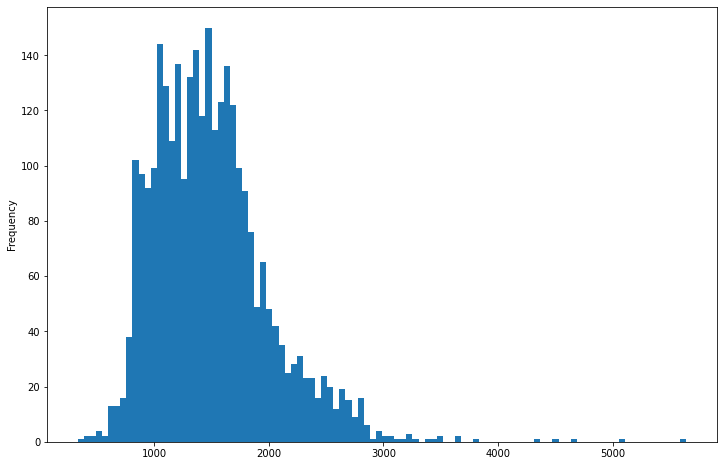

In [28]:
df['TotalSqFt'].plot(kind='hist', bins=100, figsize=(12,8))

<AxesSubplot:xlabel='TotalSqFt', ylabel='SalePrice'>

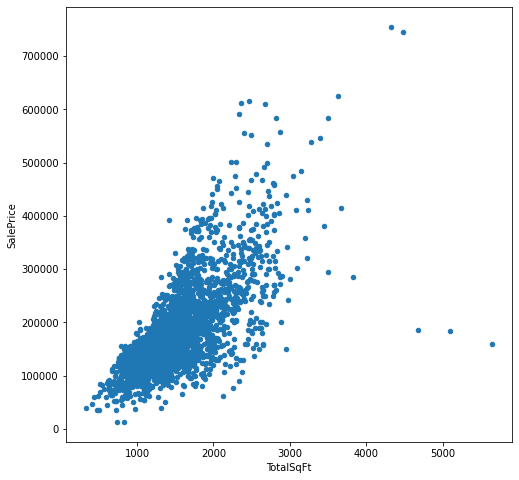

In [29]:
df[['TotalSqFt', 'SalePrice']].plot(kind="scatter", x='TotalSqFt', y='SalePrice', figsize=(8,8))

# Kitchen Quality Exploration
- very few records contain kitchens at poor or fair condition
- does an excellent quality kitchen command a higher price than good or even average?

<AxesSubplot:>

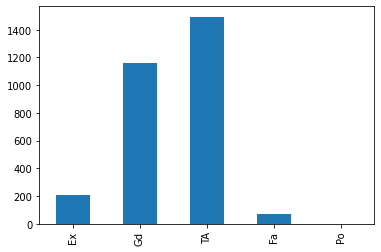

In [30]:
df['Kitchen Qual'].value_counts()[['Ex', 'Gd', 'TA', 'Fa', 'Po']].plot(kind="bar")

In [31]:
df['Kitchen Qual'].value_counts()[['Ex', 'Gd', 'TA', 'Fa', 'Po']]

Ex     205
Gd    1160
TA    1494
Fa      70
Po       1
Name: Kitchen Qual, dtype: int64

<AxesSubplot:xlabel='Kitchen Qual'>

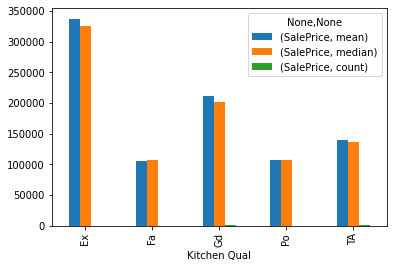

In [32]:
#find median/mean sale price within each category of quality
#combine that with value counts (make new dataframe with kitchen quality as indx and within that df make counts and means as columns of df)
#plot the result (multiple bars on single plot)
kitch_agg_df = df.groupby('Kitchen Qual').agg({'SalePrice':['mean', 'median', 'count']})
kitch_agg_df.plot(kind="bar")

In [33]:
kitch_agg_df

SalePrice              
                       mean  median count
Kitchen Qual                             
Ex            337339.341463  325624   205
Fa            105907.042857  107750    70
Gd            210835.582759  201000  1160
Po            107500.000000  107500     1
TA            139549.947791  136500  1494

In [34]:
df['Has_High_Quality_Kitchen'] = ((df['Kitchen Qual'] == 'Ex') | (df['Kitchen Qual'] == 'Gd')).astype('int')

In [35]:
df

,Full Bath,1st Flr SF,2nd Flr SF,TotalSqFt,Kitchen Qual,Bldg Type,Garage Yr Blt,TotRms AbvGrd,SalePrice,LogSalePrice,SQRTSalePrice,4thRootSalePrice,Has_High_Quality_Kitchen
0,1,1656,0,1656,TA,1Fam,1960.0,7,215000,12.278393,463.680925,21.533252,0
1,1,896,0,896,TA,1Fam,1961.0,5,105000,11.561716,324.037035,18.001029,0
2,1,1329,0,1329,Gd,1Fam,1958.0,6,172000,12.055250,414.728827,20.364892,1
3,2,2110,0,2110,Ex,1Fam,1968.0,8,244000,12.404924,493.963561,22.225291,1
4,2,928,701,1629,TA,1Fam,1997.0,6,189900,12.154253,435.775171,20.875229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,1,1003,0,1003,TA,1Fam,1984.0,6,142500,11.867097,377.491722,19.429146,0
2926,1,902,0,902,TA,1Fam,1983.0,5,131000,11.782953,361.939221,19.024700,0
2927,1,970,0,970,TA,1Fam,NaN,6,132000,11.790557,363.318042,19.060904,0
2928,1,1389,0,1389,TA,1Fam,1975.0,6,170000,12.043554,412.310563,20.305432,0


In [36]:
df['TotRms AbvGrd'].isna().value_counts()

False    2930
Name: TotRms AbvGrd, dtype: int64

<AxesSubplot:ylabel='Frequency'>

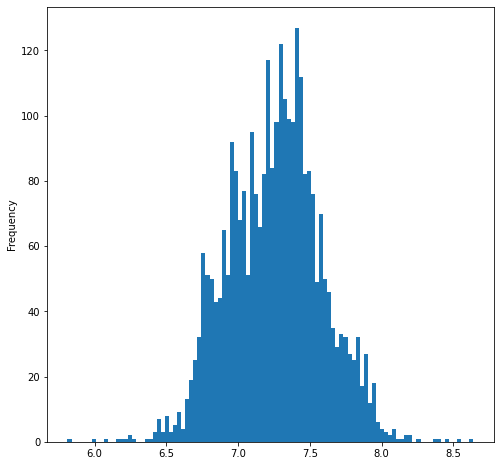

In [37]:
df["LogTotalSqFt"] = np.log(df["TotalSqFt"])
df["SQRTTotalSqFt"] = np.sqrt(df["TotalSqFt"])
df["LogTotalSqFt"].plot(kind="hist", bins=100, figsize=(8,8))

<AxesSubplot:ylabel='Frequency'>

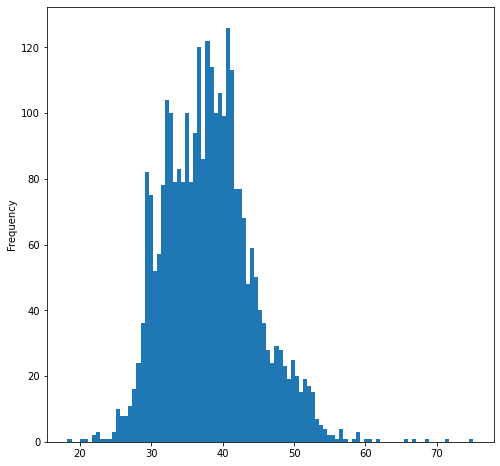

In [38]:
df["SQRTTotalSqFt"].plot(kind="hist", bins=100, figsize=(8,8))

<AxesSubplot:xlabel='LogTotalSqFt', ylabel='4thRootSalePrice'>

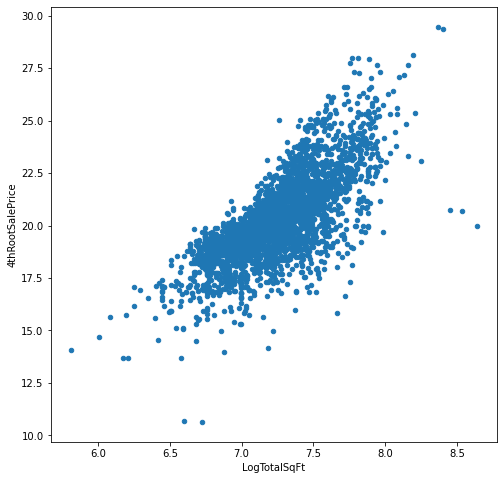

In [39]:
df[["LogTotalSqFt", "4thRootSalePrice"]].plot(kind="scatter", x="LogTotalSqFt", y="4thRootSalePrice", figsize=(8,8))

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Full Bath', 'TotalSqFt', 'TotRms AbvGrd', 'Has_High_Quality_Kitchen', 'LogTotalSqFt', 'SQRTTotalSqFt']], 
                                                    df[['SalePrice', 'LogSalePrice', '4thRootSalePrice']], test_size=0.33, random_state=42)

In [41]:
original_features = ['Full Bath', 'TotalSqFt', 'TotRms AbvGrd', 'Has_High_Quality_Kitchen']
transformed_features = ['Full Bath', 'LogTotalSqFt', 'TotRms AbvGrd', 'Has_High_Quality_Kitchen']
original_target = 'SalePrice'
transformed_target = '4thRootSalePrice'

In [42]:
original_model = LinearRegression()
original_model.fit(X=X_train[original_features], y=y_train[original_target])

LinearRegression()

In [43]:
transformed_model = LinearRegression()
transformed_model.fit(X=X_train[transformed_features], y=y_train[transformed_target])

LinearRegression()

In [44]:
actual_price = y_test[original_target]
original_model_predicted_price = original_model.predict(X_test[original_features])
transformed_model_predicted_price = np.power(transformed_model.predict(X_test[transformed_features]), 4)

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
print(np.sqrt(mean_squared_error(actual_price, original_model_predicted_price)))
print(np.sqrt(mean_squared_error(actual_price, transformed_model_predicted_price)))
print(mean_absolute_error(actual_price, original_model_predicted_price))
print(mean_absolute_error(actual_price, transformed_model_predicted_price))

50347.11419930863
50618.05711226863
34528.26168806739
33833.134441231174


In [53]:
evaluation_df = pd.DataFrame({"ActualPrice":actual_price, "OriginalModelPrice":original_model_predicted_price, "TransformedModelPredictedPrice":transformed_model_predicted_price})
evaluation_df

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice
1357,161000,215337.822325,210532.038955
2367,116000,106232.475017,110528.674993
2822,196500,222869.743716,220246.049246
2126,123600,109690.714629,111212.562443
1544,126000,102376.863772,103975.591988
...,...,...,...
1173,170000,212642.065769,209483.842797
2874,72000,84511.622715,80916.666383
344,189500,167330.628039,165168.773744
839,207000,167551.328308,164962.947672


<AxesSubplot:xlabel='ActualPrice', ylabel='TransformedModelPredictedPrice'>

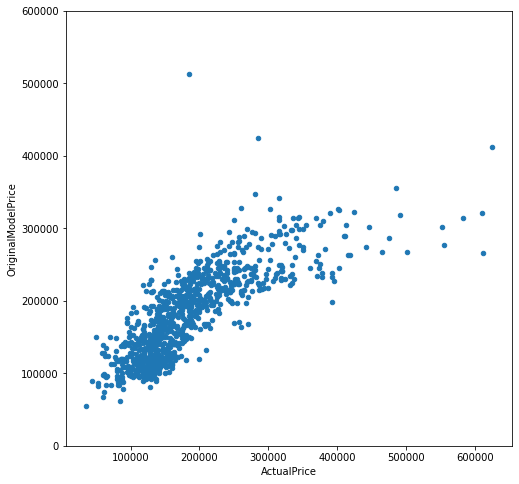

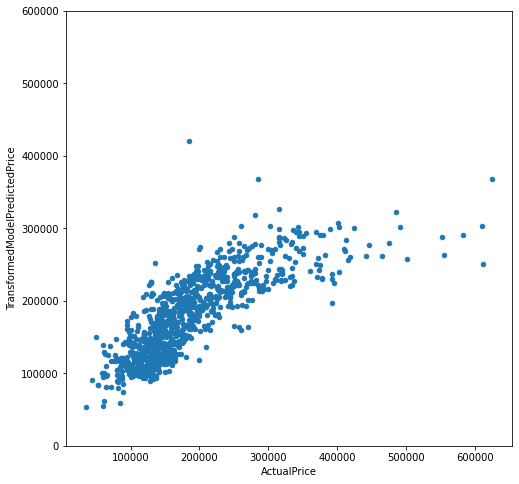

In [57]:
evaluation_df.plot(kind="scatter", x="ActualPrice", y="OriginalModelPrice", ylim=(0,600000), figsize=(8,8))
evaluation_df.plot(kind="scatter", x="ActualPrice", y="TransformedModelPredictedPrice", ylim=(0,600000), figsize=(8,8))

In [46]:

predicted_price = model.predict(X_test)
actual_price = y_test.copy()
np.sqrt(mean_squared_error(actual_price, predicted_price))

NameError: name 'model' is not defined

In [59]:
evaluation_df["OriginalModelError"] = evaluation_df["ActualPrice"] - evaluation_df["OriginalModelPrice"]
evaluation_df["TransformedModelError"] = evaluation_df["ActualPrice"] - evaluation_df["TransformedModelPredictedPrice"]

evaluation_df

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice,OriginalModelError,TransformedModelError
1357,161000,215337.822325,210532.038955,-54337.822325,-49532.038955
2367,116000,106232.475017,110528.674993,9767.524983,5471.325007
2822,196500,222869.743716,220246.049246,-26369.743716,-23746.049246
2126,123600,109690.714629,111212.562443,13909.285371,12387.437557
1544,126000,102376.863772,103975.591988,23623.136228,22024.408012
...,...,...,...,...,...
1173,170000,212642.065769,209483.842797,-42642.065769,-39483.842797
2874,72000,84511.622715,80916.666383,-12511.622715,-8916.666383
344,189500,167330.628039,165168.773744,22169.371961,24331.226256
839,207000,167551.328308,164962.947672,39448.671692,42037.052328


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

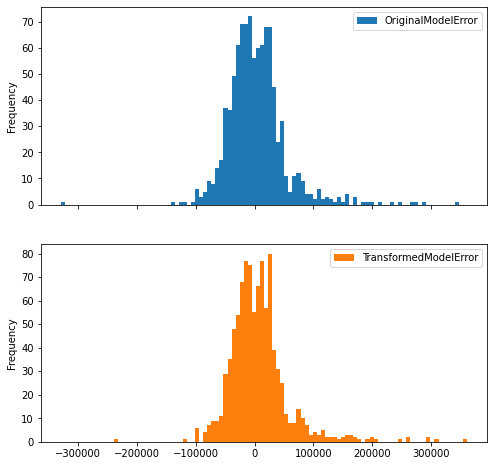

In [69]:
evaluation_df[["OriginalModelError", "TransformedModelError"]].plot(kind="hist",bins=100, figsize=(8,8), subplots=True)

In [ ]:
mean_absolute_error(actual_price, predicted_price)

In [ ]:
#1)make a scatter plot of predicted price and actual price 
#2)make a scatter plot of the error dist (want it to be normal)
#3)mean absolute deviation (SSE?Variance?) take MSE of actual price and ytest mean, is it more or less than our predicted error. do same for abs error (abs err - y median)
#4)can you think of (just using these four columns) how can we get a better score? (if possible)
#bonus: statsmodels analysis

In [ ]:
actual_price = actual_price.reset_index(drop=True)
predicted_price = pd.Series(predicted_price)
predicted_price.rename("PredictedPrice")

In [ ]:
 predicted_price

In [ ]:
actual_price

In [ ]:
#making new dataframe from predicted_price and actual_price
df2 = pd.concat([actual_price, predicted_price], axis=1)
df2.columns = ["ActualPrice", "PredictedPrice"]
df2.head()

In [ ]:
df2.plot(kind="scatter", x="ActualPrice", y="PredictedPrice", figsize=(8,8))

In [ ]:
error_series = df2["ActualPrice"] - df2["PredictedPrice"]
error_series.rename("ErrorSeries")
df3 = pd.concat([df2["ActualPrice"], error_series], axis=1)
df3.columns = ["ActualPrice", "Error"]
df3.head()

In [ ]:
df3["Error"].plot(kind="hist", bins=100, figsize=(8,8))

In [ ]:
y_train.mean()

In [ ]:
baseline = pd.Series(y_train.mean(), index=y_test.index)

In [ ]:
baseline

In [ ]:
np.sqrt(mean_squared_error(actual_price, baseline))

In [ ]:
mean_absolute_error(actual_price, baseline)

In [ ]:
#we have almost half the absolute error and almost 2/3 the squared error

In [ ]:
#make same comparison of error distribution
#take a few other combinations of transformed/scale output
#try different model type (gradient boosting)(decision tree first)

In [105]:
#introducing decision trees
from sklearn import tree
dt_model = tree.DecisionTreeRegressor(max_depth=4, criterion="squared_error", min_samples_split=6)
dt_model.fit(X=X_train[original_features], y=y_train[original_target])

DecisionTreeRegressor(max_depth=4, min_samples_split=6)

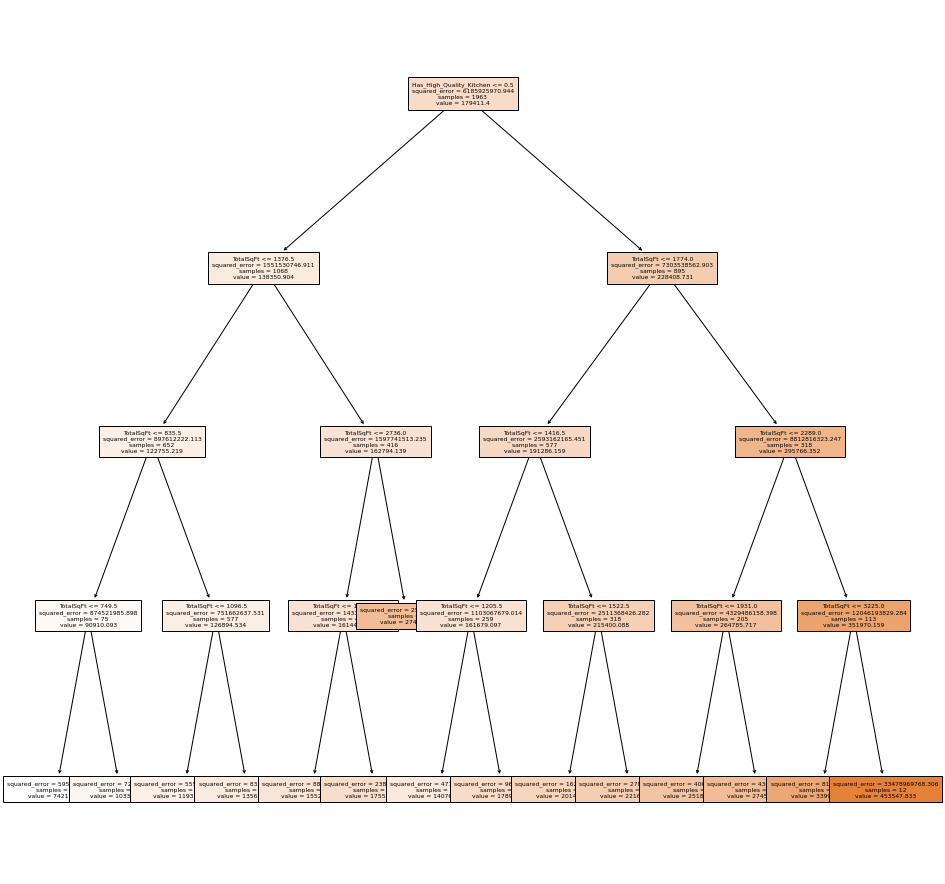

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
ax = plt.axes()
annotations=tree.plot_tree(dt_model, ax=ax, fontsize=6, feature_names=original_features, filled=True)
plt.savefig('tree_depth_4_abserr_split6', dpi=100)

In [110]:
evaluation_df[["OriginalModelError", "TransformedModelError"]].plot(kind="hist",bins=100, figsize=(8,8), subplots=True) = dt_model.predict(X_test[original_features])
actual_price = y_test[original_target]

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [109]:
print(np.sqrt(mean_squared_error(actual_price, original_model_predicted_price)))
print(np.sqrt(mean_squared_error(actual_price, transformed_model_predicted_price)))
print(mean_absolute_error(actual_price, original_model_predicted_price))
print(mean_absolute_error(actual_price, transformed_model_predicted_price))
print(np.sqrt(mean_squared_error(actual_price, dt_model_predicted_price)))
print(mean_absolute_error(actual_price, dt_model_predicted_price))

50347.11419930863
50618.05711226863
34528.26168806739
33833.134441231174
48558.216603917084
33522.25517108729


In [112]:
evaluation_df["DTModelPredicted"] = dt_model_predicted_price
evaluation_df.head()

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice,OriginalModelError,TransformedModelError,DTModelPredicted
1357,161000,215337.822325,210532.038955,-54337.822325,-49532.038955,221699.178082
2367,116000,106232.475017,110528.674993,9767.524983,5471.325007,119316.750809
2822,196500,222869.743716,220246.049246,-26369.743716,-23746.049246,221699.178082
2126,123600,109690.714629,111212.562443,13909.285371,12387.437557,119316.750809
1544,126000,102376.863772,103975.591988,23623.136228,22024.408012,119316.750809


In [113]:
evaluation_df["DTModelError"] = evaluation_df["ActualPrice"] - evaluation_df["DTModelPredicted"]
evaluation_df

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice,OriginalModelError,TransformedModelError,DTModelPredicted,DTModelError
1357,161000,215337.822325,210532.038955,-54337.822325,-49532.038955,221699.178082,-60699.178082
2367,116000,106232.475017,110528.674993,9767.524983,5471.325007,119316.750809,-3316.750809
2822,196500,222869.743716,220246.049246,-26369.743716,-23746.049246,221699.178082,-25199.178082
2126,123600,109690.714629,111212.562443,13909.285371,12387.437557,119316.750809,4283.249191
1544,126000,102376.863772,103975.591988,23623.136228,22024.408012,119316.750809,6683.249191
...,...,...,...,...,...,...,...
1173,170000,212642.065769,209483.842797,-42642.065769,-39483.842797,178914.654930,-8914.654930
2874,72000,84511.622715,80916.666383,-12511.622715,-8916.666383,74215.406250,-2215.406250
344,189500,167330.628039,165168.773744,22169.371961,24331.226256,155208.508772,34291.491228
839,207000,167551.328308,164962.947672,39448.671692,42037.052328,155208.508772,51791.491228


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

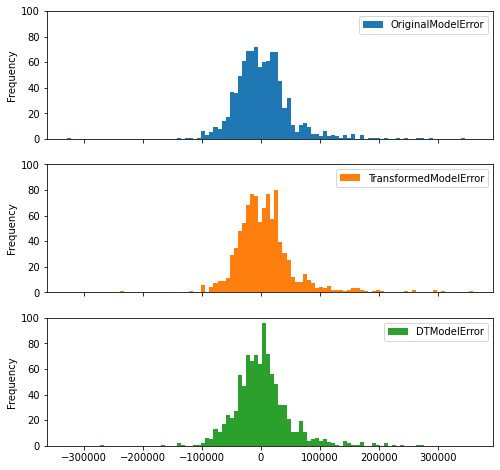

In [115]:
evaluation_df[["OriginalModelError", "TransformedModelError", "DTModelError"]].plot(kind="hist",bins=100, figsize=(8,8), subplots=True, ylim=(0,100))

<AxesSubplot:xlabel='ActualPrice', ylabel='DTModelPredicted'>

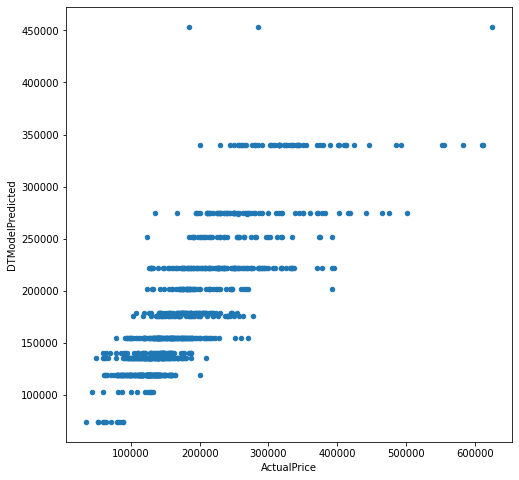

In [118]:
evaluation_df.plot(kind="scatter", x="ActualPrice", y="DTModelPredicted", figsize=(8,8))

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

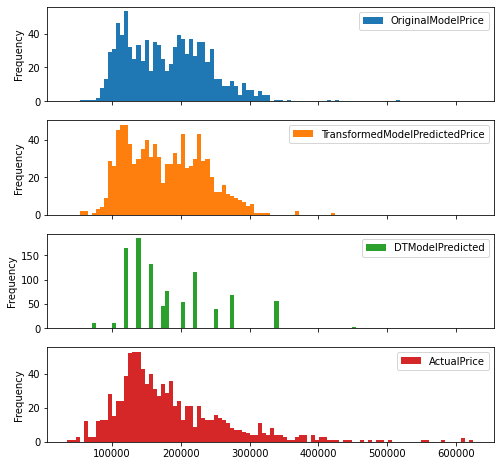

In [125]:
evaluation_df[["OriginalModelPrice", "TransformedModelPredictedPrice", "DTModelPredicted", "ActualPrice"]].plot(kind="hist", bins=100, figsize=(8,8), subplots=True)

In [126]:
from sklearn import ensemble
rf_model = ensemble.RandomForestRegressor(n_estimators=100)
gb_model = ensemble.GradientBoostingRegressor(n_estimators=100)

In [127]:
rf_model.fit(X=X_train[original_features], y=y_train[original_target])

RandomForestRegressor()

In [128]:
gb_model.fit(X=X_train[original_features], y=y_train[original_target])

GradientBoostingRegressor()

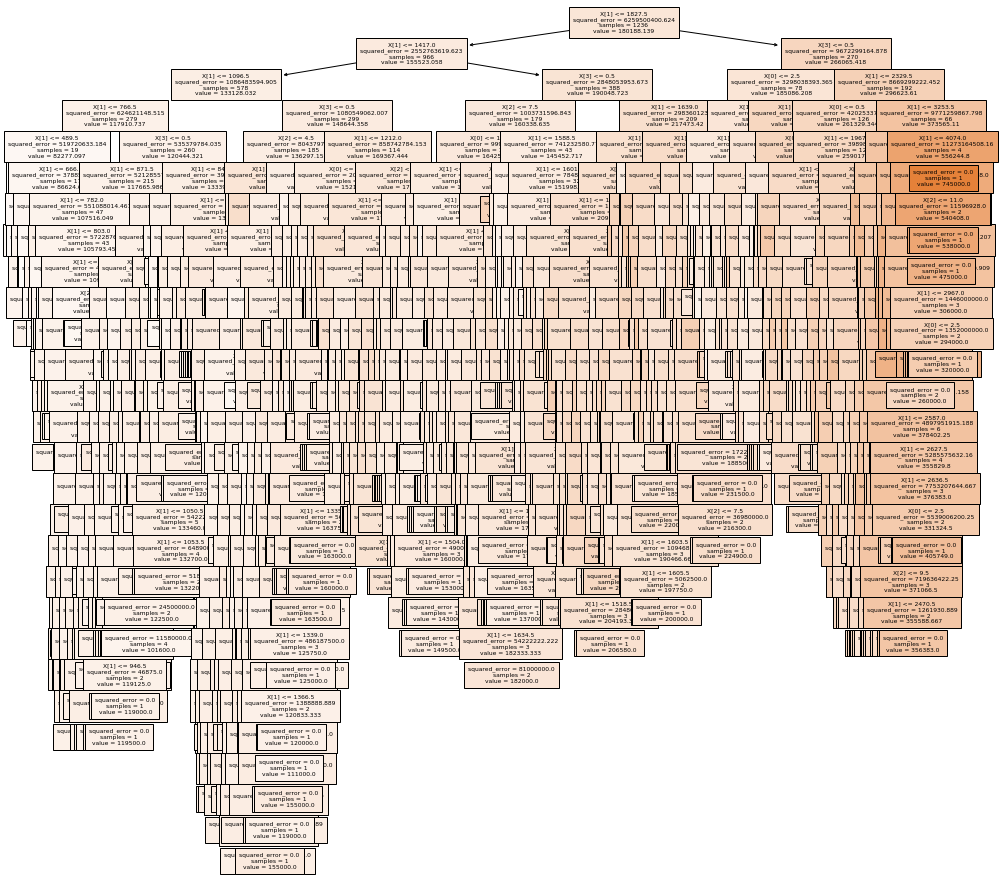

In [129]:
plt.figure(figsize=(16,16))
ax = plt.axes()
annotations=tree.plot_tree(rf_model.estimators_[0], ax=ax, fontsize=6, filled=True)
plt.savefig('randomforest_tree_0', dpi=100)

In [130]:
evaluation_df["RandomForestPredicted"] = rf_model.predict(X_test[original_features])

In [131]:
evaluation_df["GradientBoostingPredicted"] = gb_model.predict(X_test[original_features])

In [132]:
evaluation_df

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice,OriginalModelError,TransformedModelError,DTModelPredicted,DTModelError,RandomForestPredicted,GradientBoostingPredicted
1357,161000,215337.822325,210532.038955,-54337.822325,-49532.038955,221699.178082,-60699.178082,200335.620000,205370.817396
2367,116000,106232.475017,110528.674993,9767.524983,5471.325007,119316.750809,-3316.750809,145606.083333,124851.156534
2822,196500,222869.743716,220246.049246,-26369.743716,-23746.049246,221699.178082,-25199.178082,213985.680000,215182.117045
2126,123600,109690.714629,111212.562443,13909.285371,12387.437557,119316.750809,4283.249191,148706.678571,121350.102761
1544,126000,102376.863772,103975.591988,23623.136228,22024.408012,119316.750809,6683.249191,124961.428571,117133.001332
...,...,...,...,...,...,...,...,...,...
1173,170000,212642.065769,209483.842797,-42642.065769,-39483.842797,178914.654930,-8914.654930,195176.643333,191607.463732
2874,72000,84511.622715,80916.666383,-12511.622715,-8916.666383,74215.406250,-2215.406250,102708.015079,85125.993849
344,189500,167330.628039,165168.773744,22169.371961,24331.226256,155208.508772,34291.491228,184422.293651,152224.876359
839,207000,167551.328308,164962.947672,39448.671692,42037.052328,155208.508772,51791.491228,176893.000000,166055.136577


array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

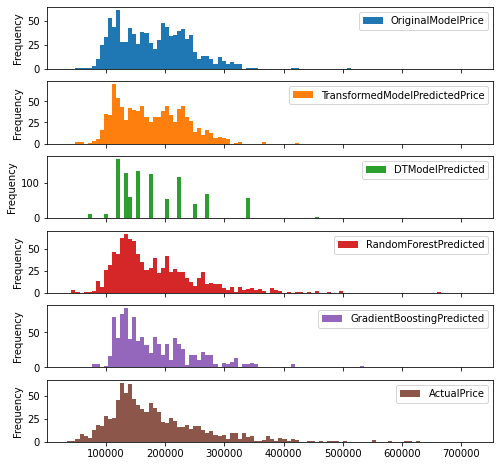

In [133]:
evaluation_df[["OriginalModelPrice", "TransformedModelPredictedPrice", "DTModelPredicted", "RandomForestPredicted", "GradientBoostingPredicted", "ActualPrice"]].plot(kind="hist", bins=100, figsize=(8,8), subplots=True)

In [134]:
evaluation_df["rf_error"] = evaluation_df["ActualPrice"] - evaluation_df["RandomForestPredicted"]
evaluation_df

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice,OriginalModelError,TransformedModelError,DTModelPredicted,DTModelError,RandomForestPredicted,GradientBoostingPredicted,rf_error
1357,161000,215337.822325,210532.038955,-54337.822325,-49532.038955,221699.178082,-60699.178082,200335.620000,205370.817396,-39335.620000
2367,116000,106232.475017,110528.674993,9767.524983,5471.325007,119316.750809,-3316.750809,145606.083333,124851.156534,-29606.083333
2822,196500,222869.743716,220246.049246,-26369.743716,-23746.049246,221699.178082,-25199.178082,213985.680000,215182.117045,-17485.680000
2126,123600,109690.714629,111212.562443,13909.285371,12387.437557,119316.750809,4283.249191,148706.678571,121350.102761,-25106.678571
1544,126000,102376.863772,103975.591988,23623.136228,22024.408012,119316.750809,6683.249191,124961.428571,117133.001332,1038.571429
...,...,...,...,...,...,...,...,...,...,...
1173,170000,212642.065769,209483.842797,-42642.065769,-39483.842797,178914.654930,-8914.654930,195176.643333,191607.463732,-25176.643333
2874,72000,84511.622715,80916.666383,-12511.622715,-8916.666383,74215.406250,-2215.406250,102708.015079,85125.993849,-30708.015079
344,189500,167330.628039,165168.773744,22169.371961,24331.226256,155208.508772,34291.491228,184422.293651,152224.876359,5077.706349
839,207000,167551.328308,164962.947672,39448.671692,42037.052328,155208.508772,51791.491228,176893.000000,166055.136577,30107.000000


In [135]:
evaluation_df["gb_error"] = evaluation_df["ActualPrice"] - evaluation_df["GradientBoostingPredicted"]
evaluation_df

,ActualPrice,OriginalModelPrice,TransformedModelPredictedPrice,OriginalModelError,TransformedModelError,DTModelPredicted,DTModelError,RandomForestPredicted,GradientBoostingPredicted,rf_error,gb_error
1357,161000,215337.822325,210532.038955,-54337.822325,-49532.038955,221699.178082,-60699.178082,200335.620000,205370.817396,-39335.620000,-44370.817396
2367,116000,106232.475017,110528.674993,9767.524983,5471.325007,119316.750809,-3316.750809,145606.083333,124851.156534,-29606.083333,-8851.156534
2822,196500,222869.743716,220246.049246,-26369.743716,-23746.049246,221699.178082,-25199.178082,213985.680000,215182.117045,-17485.680000,-18682.117045
2126,123600,109690.714629,111212.562443,13909.285371,12387.437557,119316.750809,4283.249191,148706.678571,121350.102761,-25106.678571,2249.897239
1544,126000,102376.863772,103975.591988,23623.136228,22024.408012,119316.750809,6683.249191,124961.428571,117133.001332,1038.571429,8866.998668
...,...,...,...,...,...,...,...,...,...,...,...
1173,170000,212642.065769,209483.842797,-42642.065769,-39483.842797,178914.654930,-8914.654930,195176.643333,191607.463732,-25176.643333,-21607.463732
2874,72000,84511.622715,80916.666383,-12511.622715,-8916.666383,74215.406250,-2215.406250,102708.015079,85125.993849,-30708.015079,-13125.993849
344,189500,167330.628039,165168.773744,22169.371961,24331.226256,155208.508772,34291.491228,184422.293651,152224.876359,5077.706349,37275.123641
839,207000,167551.328308,164962.947672,39448.671692,42037.052328,155208.508772,51791.491228,176893.000000,166055.136577,30107.000000,40944.863423


In [138]:
print(np.sqrt(mean_squared_error(actual_price, original_model_predicted_price)))
print(np.sqrt(mean_squared_error(actual_price, transformed_model_predicted_price)))
print(mean_absolute_error(actual_price, original_model_predicted_price))
print(mean_absolute_error(actual_price, transformed_model_predicted_price))
print(np.sqrt(mean_squared_error(actual_price, dt_model_predicted_price)))
print(mean_absolute_error(actual_price, dt_model_predicted_price))
print(np.sqrt(mean_squared_error(actual_price, evaluation_df["RandomForestPredicted"])))
print(mean_absolute_error(actual_price, evaluation_df["RandomForestPredicted"]))
print(np.sqrt(mean_squared_error(actual_price, evaluation_df["GradientBoostingPredicted"])))
print(mean_absolute_error(actual_price, evaluation_df["GradientBoostingPredicted"]))

50347.11419930863
50618.05711226863
34528.26168806739
33833.134441231174
48558.216603917084
33522.25517108729
52758.90688336535
34077.62615157496
50143.89855447077
32391.296379528754


In [141]:
gb_model.feature_importances_

array([0.04630007, 0.61228929, 0.0300192 , 0.31139144])

In [142]:
original_features

['Full Bath', 'TotalSqFt', 'TotRms AbvGrd', 'Has_High_Quality_Kitchen']